In [ ]:
#important libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings 
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [ ]:
#load dataset
df=pd.read_csv('telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# here we see target variable is churn and is a classification dataset 
# here we have to predict whether customer subscribe the service or not 

In [ ]:
# solve EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# here we can see above 7043 rows and 21 columns and there is no any null values
# check null value
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

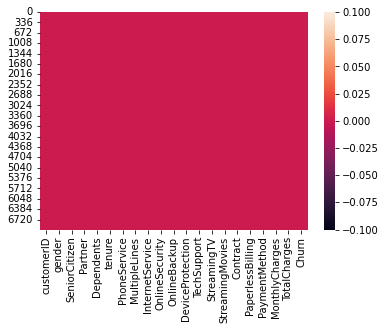

In [ ]:
# visulaize null value
sns.heatmap(df.isna())
plt.show()

In [ ]:
# first we delte customerID 
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# we got TotalCharges column have numeric value but its datatype is object lets check
df['TotalCharges'].unique()


array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
19.65       8
20.05       8
           ..
1530.6      1
216.45      1
1652.1      1
4156.8      1
4370.75     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
#here we got space because of that its datatype is object now we replace that by mean value
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [ ]:
df['TotalCharges'].isna().sum()

11

In [ ]:
df['TotalCharges']=df['TotalCharges'].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [ ]:
df['TotalCharges'].value_counts()

20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

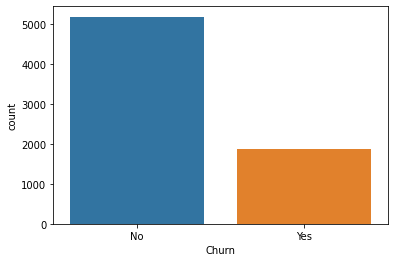

In [ ]:
sns.countplot(data=df,x='Churn')
plt.show()

In [ ]:
# first we select data separatly object type and numberic type then convert it into numberic type 
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes('object')

In [ ]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
for col in df_cat:
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [ ]:
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70,151.65


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   PhoneService      7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  Churn             7043 non-null   int64  
 16  SeniorCitizen     7043 non-null   int64  


In [ ]:
x=df_new.drop('Churn',axis=1)
y=df_new['Churn']

In [ ]:
x

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0,24,84.80,1990.50
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0,72,103.20,7362.90
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0,11,29.60,346.45
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1,4,74.40,306.60


In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
svml=SVC(kernel="linear")
rt=RandomForestClassifier()

In [ ]:
model=[]
model.append(lr)
model.append(knn)
model.append(svm)
#model.append(svml)
model.append(rt)

In [ ]:
def mymodel(model):
  model.fit(xtrain,ytrain)
  ypred=model.predict(xtest)
  print(classification_report(ytest,ypred))

In [ ]:
for i in model:
  print(i)
  mymodel(i)
  print()
  print()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1585
           1       0.56      0.48      0.52       528

    accuracy                           0.78      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1585
           1       0.00      0.00      0.00       528

    accuracy                           0.75      2113
   macro avg       0.38      0.50      0.43      2113
weighted avg       0.56      0.75      0.64      2113



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1   

In [ ]:
#here we got best score on Logistic regression and random forest classifier 81% 
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=1)
xsample,ysample=ros.fit_resample(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ysample.shape

(7178,)

In [ ]:
#step :- initalise the model
ann=tf.keras.Sequential()
#step :- add the hidden layer(optional)
ann.add(tf.keras.layers.Dense(units=30,activation='relu')) # unit- is how many hidden box will be created
ann.add(tf.keras.layers.Dense(units=20,activation='relu'))
                                                     # relu - is rectified linear unit

 #step 2 :- add the output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
 #step 3:- estabilish connection between all the layer 
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# adam is nothing but advance of Gradient Decent
#step 4:- train the model     
ann.fit(xtrain,ytrain,batch_size=30,epochs=100)                                               

Epoch 1/100
165/165 [==============================] - 1s 2ms/step - loss: 14.7366 - accuracy: 0.6598
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7458
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7590
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.9370 - accuracy: 0.7353
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.7471
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6014 - accuracy: 0.7564
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.7627
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.7224 - accuracy: 0.7535
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7753
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5661 - accur

In [ ]:
from sklearn.metrics import classification_report

ypred=ann.predict(xtest)
ypred=ypred>0.5
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1585
           1       0.00      0.00      0.00       528

    accuracy                           0.75      2113
   macro avg       0.38      0.50      0.43      2113
weighted avg       0.56      0.75      0.64      2113



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

#step :- initalise the model
ann=tf.keras.Sequential()
#step :- add the hidden layer(optional)
ann.add(tf.keras.layers.Dense(units=20,activation='relu')) # unit- is how many hidden box will be created
                                                         # relu - is rectified linear unit
ann.add(tf.keras.layers.Dense(units=15,activation='relu'))

 #step 2 :- add the output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
 #step 3:- estabilish connection between all the layer 
ann.compile(optimizer='adam',loss='binary_crossentropy')
# adam is nothing but advance of Gradient Decent
#step 4:- train the model     
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100) 

Epoch 1/100
155/155 [==============================] - 1s 3ms/step - loss: 49.8997 - val_loss: 0.5628
Epoch 2/100
155/155 [==============================] - 0s 2ms/step - loss: 0.9713 - val_loss: 1.1400
Epoch 3/100
155/155 [==============================] - 0s 2ms/step - loss: 1.1366 - val_loss: 0.5587
Epoch 4/100
155/155 [==============================] - 0s 3ms/step - loss: 0.6246 - val_loss: 0.4366
Epoch 5/100
155/155 [==============================] - 0s 2ms/step - loss: 0.8141 - val_loss: 1.1332
Epoch 6/100
155/155 [==============================] - 0s 2ms/step - loss: 0.9193 - val_loss: 0.8837
Epoch 7/100
155/155 [==============================] - 0s 2ms/step - loss: 0.7901 - val_loss: 0.5252
Epoch 8/100
155/155 [==============================] - 0s 3ms/step - loss: 0.6162 - val_loss: 0.4663
Epoch 9/100
155/155 [==============================] - 0s 2ms/step - loss: 0.6310 - val_loss: 0.4927
Epoch 10/100
155/155 [==============================] - 0s 2ms/step - loss: 0.7044 - val_l

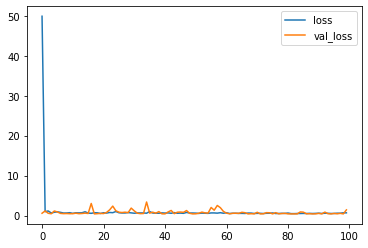

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ann=tf.keras.Sequential()
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))
ann.add(tf.keras.layers.Dense(units=20,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25)
ann.fit(xtrain, ytrain, epochs=600, validation_data=(xtest, ytest), callbacks=[earlystop])

Epoch 1/600
155/155 [==============================] - 1s 3ms/step - loss: 29.0549 - val_loss: 0.4925
Epoch 2/600
155/155 [==============================] - 0s 3ms/step - loss: 0.8176 - val_loss: 0.4656
Epoch 3/600
155/155 [==============================] - 0s 2ms/step - loss: 0.8726 - val_loss: 2.0336
Epoch 4/600
155/155 [==============================] - 0s 3ms/step - loss: 0.7996 - val_loss: 0.5828
Epoch 5/600
155/155 [==============================] - 0s 2ms/step - loss: 1.0703 - val_loss: 1.4815
Epoch 6/600
155/155 [==============================] - 0s 2ms/step - loss: 1.2660 - val_loss: 2.3147
Epoch 7/600
155/155 [==============================] - 0s 2ms/step - loss: 1.1532 - val_loss: 0.4400
Epoch 8/600
155/155 [==============================] - 0s 2ms/step - loss: 0.9896 - val_loss: 0.5699
Epoch 9/600
155/155 [==============================] - 0s 2ms/step - loss: 0.7469 - val_loss: 2.3109
Epoch 10/600
155/155 [==============================] - 0s 2ms/step - loss: 1.0433 - val_l

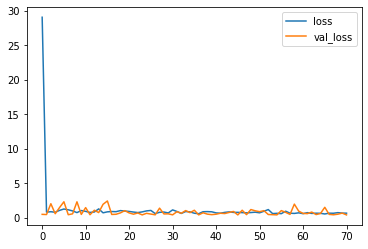

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:

from tensorflow.keras.layers import Dropout
ann = tf.keras.Sequential()

ann.add(tf.keras.layers.Dense(units=30, activation="relu"))
ann.add(Dropout(rate=0.5))

ann.add(tf.keras.layers.Dense(units=15, activation="relu"))
ann.add(Dropout(rate=0.5))

ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

ann.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
ann.fit(xtrain, ytrain, epochs=600, validation_data=(xtest, ytest), callbacks=[earlystop])

Epoch 1/600
155/155 [==============================] - 1s 3ms/step - loss: 173.4493 - val_loss: 38.4401
Epoch 2/600
155/155 [==============================] - 0s 2ms/step - loss: 55.7080 - val_loss: 1.0327
Epoch 3/600
155/155 [==============================] - 0s 2ms/step - loss: 20.7856 - val_loss: 0.6227
Epoch 4/600
155/155 [==============================] - 0s 2ms/step - loss: 8.6209 - val_loss: 0.6316
Epoch 5/600
155/155 [==============================] - 0s 2ms/step - loss: 4.7579 - val_loss: 0.5973
Epoch 6/600
155/155 [==============================] - 0s 2ms/step - loss: 3.2641 - val_loss: 0.5821
Epoch 7/600
155/155 [==============================] - 0s 2ms/step - loss: 2.5056 - val_loss: 0.5714
Epoch 8/600
155/155 [==============================] - 0s 2ms/step - loss: 1.7854 - val_loss: 0.5853
Epoch 9/600
155/155 [==============================] - 0s 2ms/step - loss: 1.6353 - val_loss: 0.5715
Epoch 10/600
155/155 [==============================] - 0s 2ms/step - loss: 1.6548 - v

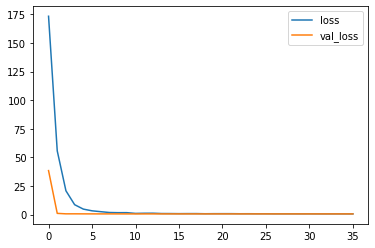

In [ ]:
lossdf=pd.DataFrame(ann.history.history)
lossdf.plot()

In [ ]:
ypred=ann.predict(xtest)
ypred=ypred>0.5
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1585
           1       0.00      0.00      0.00       528

    accuracy                           0.75      2113
   macro avg       0.38      0.50      0.43      2113
weighted avg       0.56      0.75      0.64      2113



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
